# DSCI 100 Group 20 Project Final Report

Participants: 

- Hannah Yin 
- Dan Choi
-
-

## 1.0 Introduction

Minecraft is an open-world sandbox game where players can freely build, explore, communicate, and form a metaverse within a virtual space. **The Pacific Laboratory for Artificial Intelligence, led by Professor Frank Wood and based in the Department of Computer Science at the University of British Columbia**, launched a data collection project called plaicraft.ai on September 27, 2023. plaicraft.ai focuses on collecting players' behaviour, such as gameplay, speech, and key presses, to train AI that can react not only to text messages but also to complex situations surrounding them.

To contribute to the research project, we have chosen one of the three broad questions provided to us: **"We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."** This question is vital for scientists to ask, as marketing this project to the targeted audience can increase both the efficiency of recruiting efforts and the quality of the data collected. 

For our DSCI 100 project, we have formulated the specific predictive question: **"Can a player's total played hours and age predict if they are subscribed to a game-related newsletter?"** We will answer our target question using one of the datasets provided to us: player.csv.


### 1.1 About the Data

In [6]:
#Let us load packages that we will use in this project. 
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

In [7]:
#First, let us load our dataset.
players <- read_csv("https://raw.githubusercontent.com/ahnnahy/dsci100-group20-project/refs/heads/main/players%20(1).csv")

#We will show the first 5 rows of the dataset as a reference and for visualization.
head(players,5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


Our dataset has 196 rows and 7 columns, for a total of 1372 observations.

The players data set shown above shows statistics on the types of players that have played on the PLAIcraft Minecraft server.

We have 7 different variables in the original dataset:
- `experience` - a character variable describing whether the player is a beginner, amateur, regular, pro, or veteran
- `subscribe` - a logical (true/false) variable that tells us if the player is subscribed to a game-related newsletter
- `hashedEmail` - a character variable of the player's email, hashed to ensure that their information is safe
- `played_hours` - a double variable of the total hours the player has played on the server
- `name` - character variable of the player's name
- `gender` - character variable of the player's gender
- `Age` - a double variable of the player's age

These data, collected from https://plaicraft.ai/, may have potential issues with variables such as `name`, `experience`, `age`, and `gender`, which are self-reported by players. These variables reported by the players can be easily faked; for example, younger players will likely enter an earlier birthday so their parents do not have to sign a consent form for them.

## 2.0 Methods

### 2.1 Distribution of Data

In [8]:
#Let us load the dataset we are working with

players <- read_csv("https://raw.githubusercontent.com/ahnnahy/dsci100-group20-project/refs/heads/main/players%20(1).csv")

head(players,5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


Warning message in geom_histogram(stat = "count", fill = "grey50"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


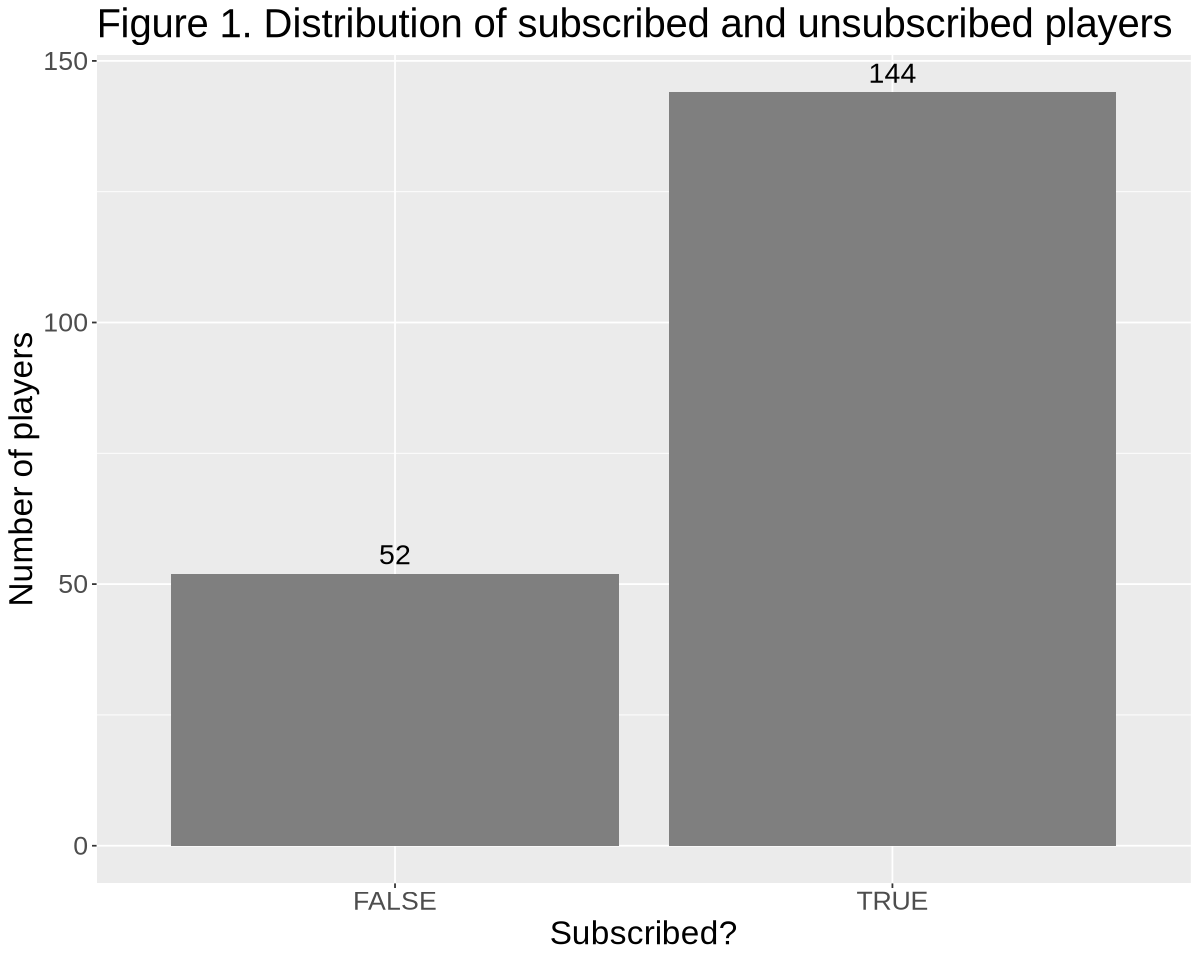

In [9]:
#Let us visualize the distribution of subscribed users and unsuscribed users.
options(repr.plot.width = 10, repr.plot.height = 8)

players_histogram <- ggplot(players, aes(x = subscribe)) +
    geom_histogram(stat = "count", fill = "grey50") +
    geom_text(stat = "count", aes(label = ..count..), vjust = -0.5, size = 6) +
    labs(x = "Subscribed?", y = "Number of players", title = "Figure 1. Distribution of subscribed and unsubscribed players") +
    theme(text = element_text(size = 20))

players_histogram

It was found through `Figure 1.` that the distribution of subscribed and unsubscribed users has a significant difference, where subscribed users are about twice that of unsubscribed users.

### Method to address our question

To address our question, we will use **KNN classification** with nearest neighbours to predict a player's subscription status based on total hours spent on the server and age. To apply this method, we will assume that the player's age was reported honestly and accurately. Potential limitations include insufficient data points to make accurate predictions and an uneven distribution of subscribed and unsubscribed players. We will split the data into a training set (75%) and a test set (25%), then use 5-fold cross-validation to find the best number of nearest neighbours and evaluate the model's accuracy on the test set.

In [14]:
#Let us change subscribe column's type from logical to factor so we can use KNN classification
players <- players |>
    mutate(subscribed = as_factor(subscribe))
head(players,6)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,subscribed
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,TRUE
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,TRUE
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,FALSE
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,TRUE
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,TRUE
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,TRUE


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


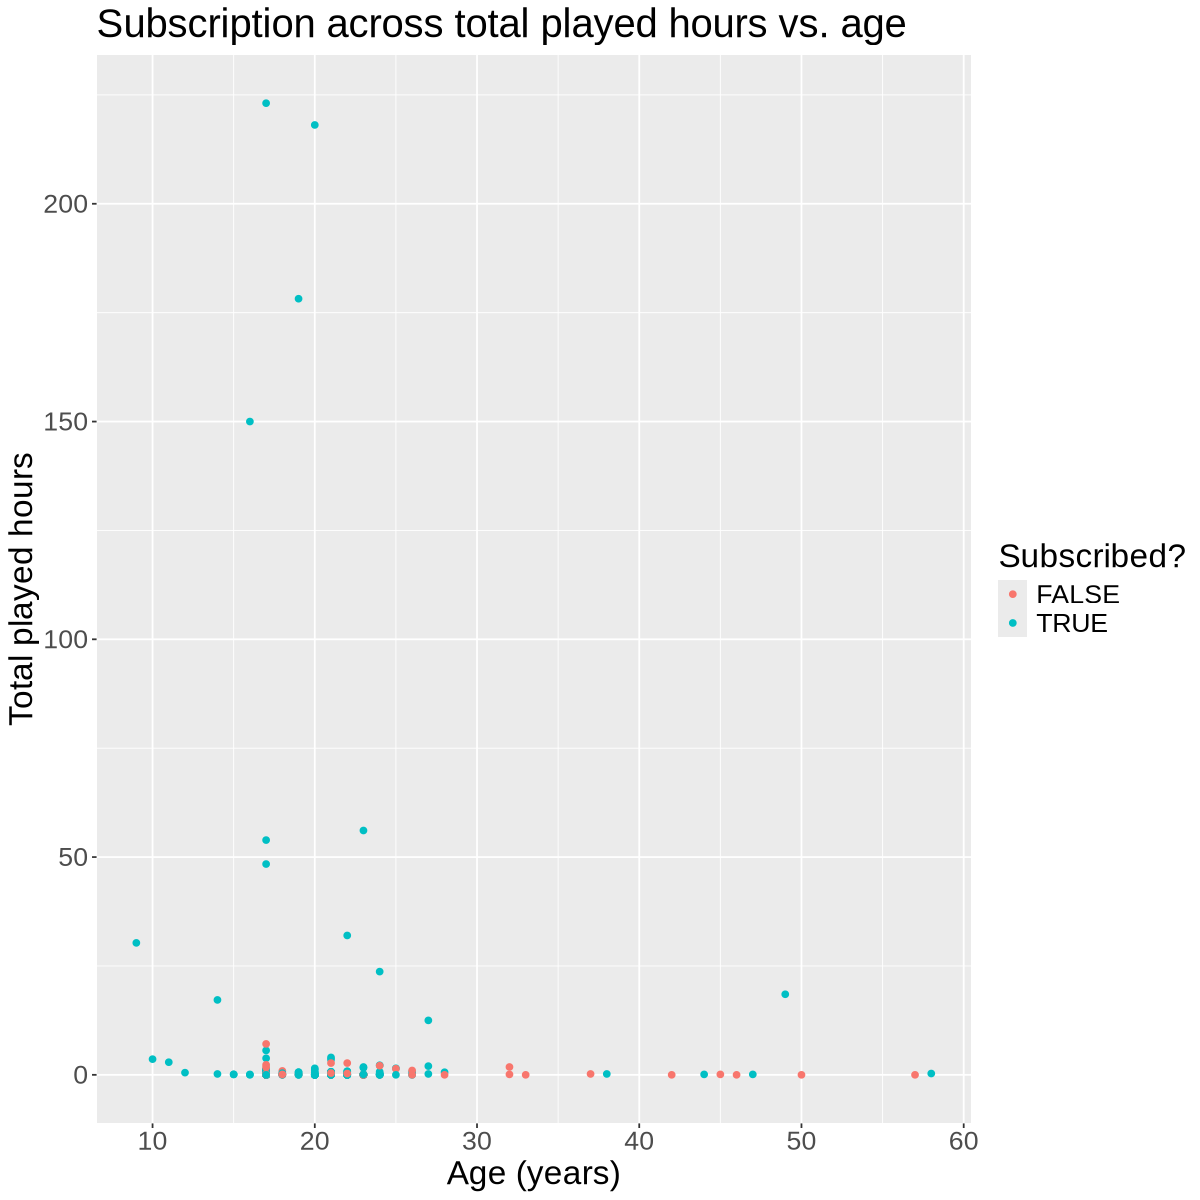

In [15]:
#Let us make a graph to visualize the subscription status in relation to age and total played hours.
options(repr.plot.width = 10, repr.plot.height = 10)

players_plot <- ggplot(players, aes(x = Age, y = played_hours, colour = subscribed)) +
    geom_point() +
    labs(x = "Age (years)", y = "Total played hours", color = "Subscribed?", title = "Subscription across total played hours vs. age") +
    theme(text = element_text(size = 20))

players_plot

**(GRAPH DESCRIPTION)**

In [16]:
set.seed(100)

players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribed)

players_recipe <- recipe(subscribed ~ Age + played_hours, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

player_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- player_results |>
  filter(.metric == "accuracy")

accuracies


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5302340,4,0.06290010,Preprocessor1_Model001
2,accuracy,binary,0.5213054,4,0.05981932,Preprocessor1_Model002
3,accuracy,binary,0.6507184,4,0.03746696,Preprocessor1_Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
98,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model098
99,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model099
100,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model100


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,accuracy,binary,0.7438218,4,0.01499838,Preprocessor1_Model019


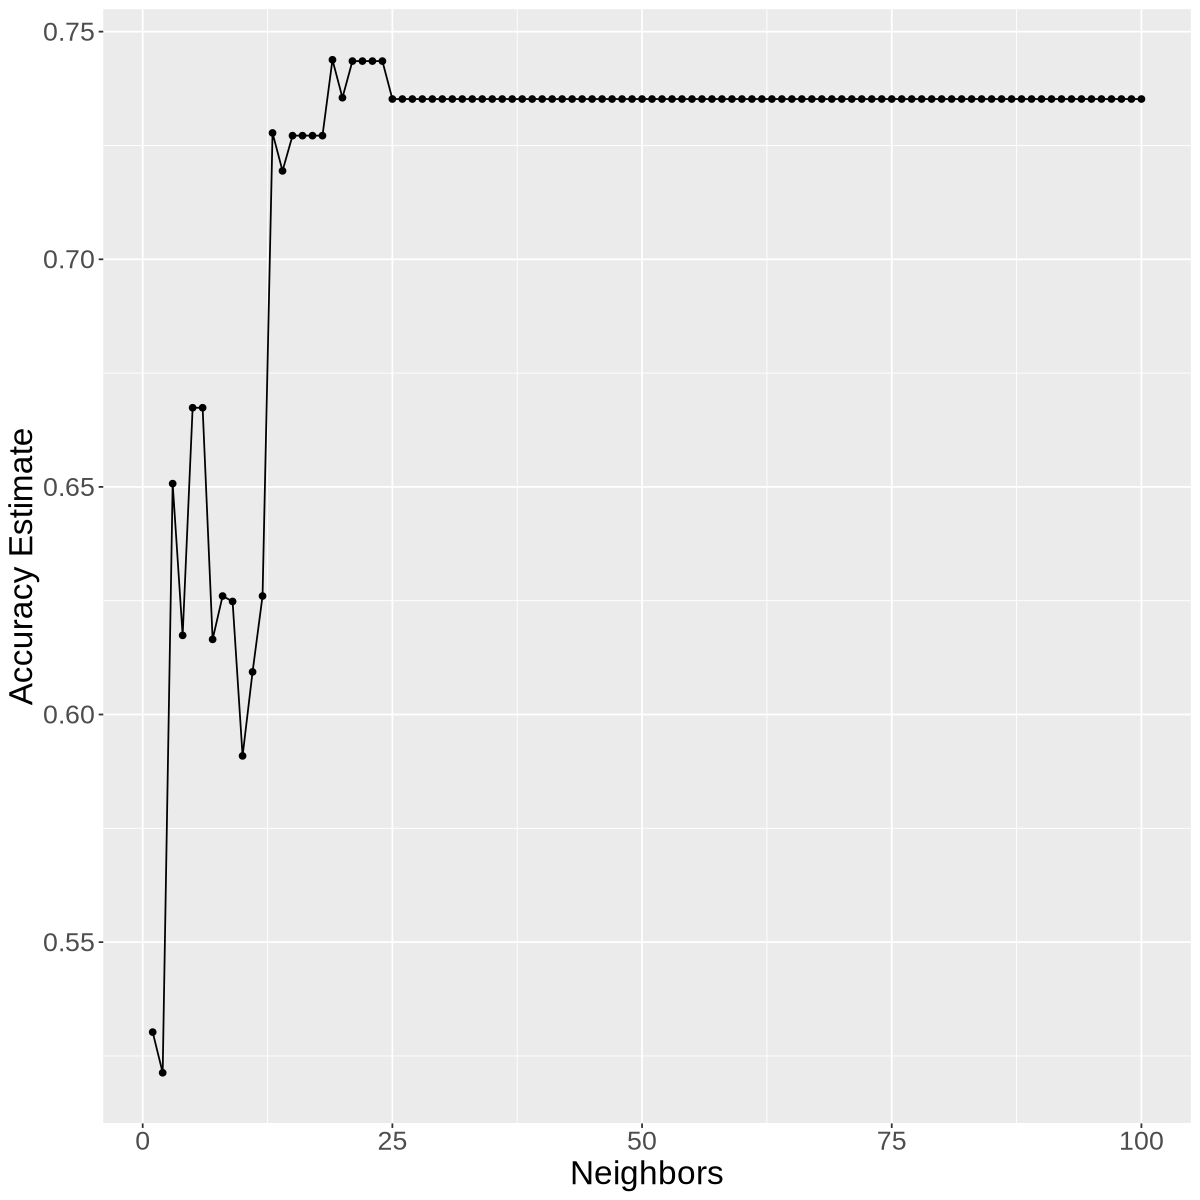

In [18]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 20))

best_k <- accuracies |>
    slice_max(mean, n = 1)

accuracy_vs_k
best_k

We can see above that the best k value to use here is k = 19. We will now run k = 19 on our cross-validation and test on the testing set. 

In [19]:
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("classification")

player_best_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_best_spec) |>
  fit(data=players_train)

player_test_predictions <- predict(player_best_results, players_test) |>
  bind_cols(players_test)

player_test_predictions |>
  metrics(truth = subscribed, estimate = .pred_class) |>
  filter(.metric == "accuracy")

ERROR: [1m[33mError[39m in `bind_cols()`:[22m
[33m![39m Can't recycle `..1` (size 48) to match `..2` (size 49).


## Discussion

## References